# Imports

In [71]:
import math
import numpy as np
import sympy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from multiset import Multiset


# Lances Code -- Task 1

Initial value of z:  -0.9999999999999984j
(0.7071067811865464-0.7071067811865464j) 0
(0.9999999999999982+0j) 1
(0.7071067811865462+0.7071067811865462j) 2
0.9999999999999981j 3
(-0.7071067811865461+0.7071067811865461j) 4
(-0.999999999999998+0j) 5
(-0.707106781186546-0.707106781186546j) 6
-0.9999999999999978j 7
(0.7071067811865459-0.7071067811865459j) 8
(0.9999999999999977+0j) 9
(0.7071067811865458+0.7071067811865458j) 10
0.9999999999999974j 11
(-0.7071067811865457+0.7071067811865457j) 12
(-0.9999999999999973+0j) 13
(-0.7071067811865456-0.7071067811865456j) 14
-0.9999999999999972j 15
(0.7071067811865455-0.7071067811865455j) 16
(0.999999999999997+0j) 17
(0.7071067811865454+0.7071067811865454j) 18
0.9999999999999969j 19
(-0.7071067811865452+0.7071067811865452j) 20
(-0.9999999999999967+0j) 21
(-0.7071067811865451-0.7071067811865451j) 22
-0.9999999999999966j 23
(0.707106781186545-0.707106781186545j) 24
(0.9999999999999963+0j) 25
(0.7071067811865449+0.7071067811865449j) 26
0.9999999999999962j

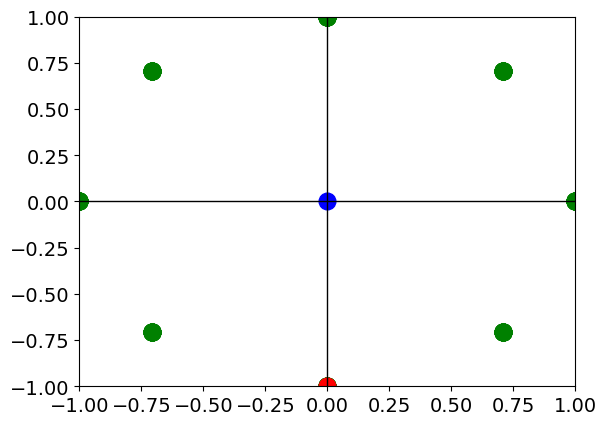

In [72]:
root_2 = math.sqrt(2) # square root of 2
alpha = 13 # alpha value is group number
z_initial = (1+1j)/(root_2)*((1j)**4)*(((1+1j)/(abs(1+1j)))**alpha) # initial value of z
u = (root_2) / (1+1j) # u value
values = [] # empty list to store values of calculations
print("Initial value of z: ", z_initial)
next_position = z_initial / u # next position of z

for i in range(64): # loop through to get different values and plot them
    z_initial = next_position
    next_position = z_initial / u
    plt.plot(z_initial.real, z_initial.imag, 'go', markersize=12)
    print(z_initial,i)
    values.append(z_initial) # add the values to the list

# calculate the mean point
mean_real = sum(z.real for z in values) / len(values)
mean_imag = sum(z.imag for z in values) / len(values)
mean_point = complex(mean_real, mean_imag)

print("Mean point: ",mean_point.real, mean_point.imag)

# plot the mean point
plt.plot(mean_point.real, mean_point.imag, 'bo', markersize=12, label='Mean Point')

plt.plot(z_initial.real, z_initial.imag, 'ro', markersize=12)
plt.xlim(-1, 1) # set x-axis limits
plt.ylim(-1, 1) # set y-axis limits
# draw solid lines for the x-axis and y-axis
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.show()

# Dauts Code -- Task 2
used Riley's code, and was helped by Riley in the implementation.

In [73]:
def task2():
    a = 13
    count = 0

    zinitial = (math.sqrt(2) * (1 + 1j)) / (((1 + 1j) / math.sqrt(2))**a)

    z_list = np.array([zinitial])
    u = math.sqrt(2) / (1 + 1j)

    while count < 64:
        zposition = z_list[count] / u
        z_list = np.append(z_list, zposition)
        zpositionmean2 = np.mean(z_list)

        if np.isclose(zpositionmean2, 0, atol=1e-1):
            print(f"Count: {count}")
            break
        count += 1

task2()

Count: 6


# Riley's code -- Task 3

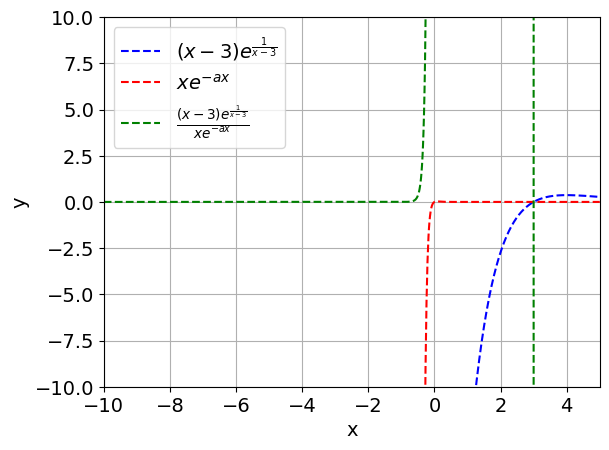

In [74]:
def task3():
    a = 13
    mpl.rcParams['font.size'] = 14
    
    # Define the range of x values
    x = np.linspace(-10, 5, 1000)

    # Calculate the function
    num = (x - 3) * (1 / np.exp(x - 3))
    den = x * np.exp(-a * x)
    
    # error handling for dividing by 0, and invalid values (which is what we are looking for)
    with np.errstate(divide='ignore', invalid='ignore'):
        y = np.where(den != 0, num / den, np.nan)
    
    # Plot the numerator, denominator, and the function of y
    plt.plot(x, num, 'b--', label=r'$(x-3)e^{\frac{1}{x-3}}$')
    plt.plot(x, den, 'r--', label=r'$xe^{-ax}$')
    plt.plot(x, y, 'g--', label=r'$\frac{(x-3)e^{\frac{1}{x-3}}}{xe^{-ax}}$')
    
    # Add labels and legend
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    
    # Set the limits for x and y axes
    plt.xlim(-10, 5)
    plt.ylim(-10, 10)
    
    # Add grid to the plot
    plt.grid()
    
    # Display the plot
    plt.show()

# Execute the function
task3()

# Josh's Code -- Task 4
[Everyone took part in this question as we was missing a member of our group]

**Initialise implicit equation** $$ {y^2} \cdot  {(x-3)^2} = {x^3} - a \cdot x \cdot (2 \cdot x - a) $$

In [75]:
a = 13  #We are group number 13 and a is equal to group number.
x, y = sp.symbols('x y')

# Intialize left hand side(lhs)  and right hand side(rhs).
lhs = sp.Pow(y, 2)*sp.Pow((x-3), 2)
rhs = sp.Pow(x, 3) - a*x*(2*x - a)

#Initilize implicit equation(eq)
eq = sp.Eq(lhs, rhs)

sp.pprint(eq)

 2        2    3                  
y ⋅(x - 3)  = x  - 13⋅x⋅(2⋅x - 13)


**Transform to explicit** $$ y =  \pm \sqrt{\frac{{x^3} - a \cdot x \cdot (2 \cdot x - a)}{{(x-2a)^2}}} $$

In [76]:
lhs = sp.Pow(y, 2)*sp.Pow((x-3), 2)
rhs = sp.Pow(x, 3) - a*x*(2*x - a)

# maniputlate for explict form of equation.

# Divide through by (x-2a)*2.
lhs = (lhs/sp.Pow((x-2*a), 2))
rhs = (rhs/sp.Pow((x-2*a), 2))
 
 # Take the square root of both.
lhs = sp.sqrt(lhs)
rhs = sp.sqrt(rhs)

eq = sp.Eq(lhs, rhs)

#Output eq to show equation in implicit form.
sp.pprint(eq)

      _____________         ______________________
     ╱  2        2         ╱  3                   
    ╱  y ⋅(x - 3)         ╱  x  - 13⋅x⋅(2⋅x - 13) 
   ╱   ───────────  =    ╱   ──────────────────── 
  ╱             2       ╱                 2       
╲╱      (x - 26)      ╲╱          (x - 26)        


**Expression to find domain**    $$ \pm \sqrt{\frac{{x^3} - 13 \cdot x \cdot(2 \cdot x - 13) }{{(x -2a)^2}}}  $$

In [77]:

# Expression under square root.
rhs = sp.Pow(rhs, 2)

# Equate to 0 and solve. Output the roots of the expression.
roots = sp.solve(rhs, x)
print(roots)


[0, 13]


Domain of F(X) and the graph of F(X)

C:\Users\riley\AppData\Local\Temp\ipykernel_18196\4088164591.py:4: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt((x**3 - 13*x*(2*x - 13))/(x -2*a)**2)


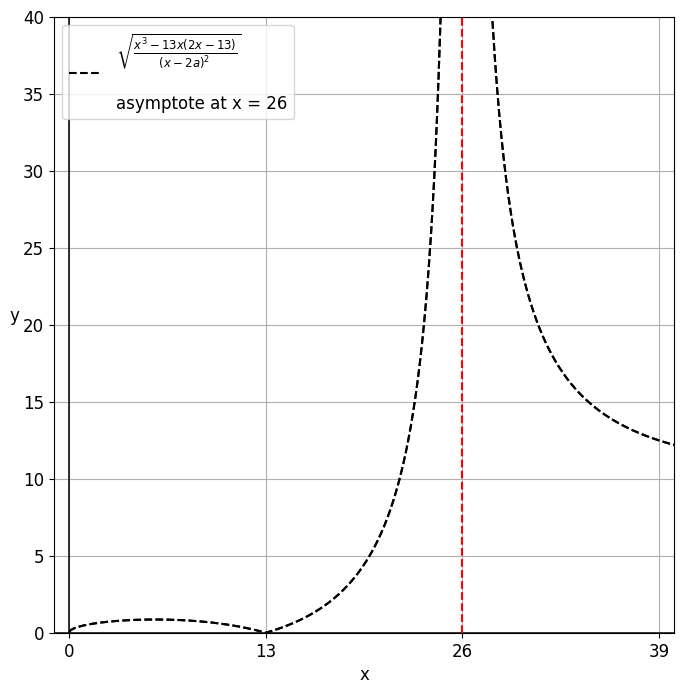

In [78]:

mpl.rcParams['font.size']=12

x = np.linspace(-10, 40, 1000)
y = np.sqrt((x**3 - 13*x*(2*x - 13))/(x -2*a)**2)
asymptote = 26


fig = plt.figure(figsize=(8, 8))
plt.plot(x, y, 'k--', label=r'$\sqrt{\frac{x^3 - 13x(2x - 13)}{(x - 2a)^2}}$' '\n\nasymptote at x = 26')
plt.grid()
plt.xlim(-1, 40)
plt.ylim(0, 40)

plt.legend(loc='upper left', fontsize=12, )
plt.xlabel('x')
plt.ylabel('y ', rotation= 0)


plt.axhline(c='black', linewidth= 1.1)
plt.axvline(c= 'black', linewidth= 1.1)
plt.plot(x, y, 'k--')
plt.axvline(x=asymptote, color='r', linestyle='--')

plt.xticks(np.arange(0, 40, 13))
plt.show()


# Josh's code -- Task 5

In [79]:
answer = '''
The player needs to choose the right hand lift as a = 0, boolean False.
On the left hand of the equivalence we have inside the bracket the proposition (p XOR q), as both are false the bracket is false. The proposition (p XOR q) XOR r is false, therefore the left hand side propositon is false.
As a is a constant and does not effect the logical result we resolve equivalent propositon first and multiply a by the outcome

The right hand side of the equivalence is true, the negation of q is true and the negation of r is true. Since it is a logical implication, the proposition is true. 

The left hand side is not equivalent to the right hand side, therefore the equivalent proposition is false.

Multiplying a by the final result will determine the answer.
The final answer a = 0 or boolean False.
Therefore choose the right hand side.
'''

print(answer)


The player needs to choose the right hand lift as a = 0, boolean False.
On the left hand of the equivalence we have inside the bracket the proposition (p XOR q), as both are false the bracket is false. The proposition (p XOR q) XOR r is false, therefore the left hand side propositon is false.
As a is a constant and does not effect the logical result we resolve equivalent propositon first and multiply a by the outcome

The right hand side of the equivalence is true, the negation of q is true and the negation of r is true. Since it is a logical implication, the proposition is true. 

The left hand side is not equivalent to the right hand side, therefore the equivalent proposition is false.

Multiplying a by the final result will determine the answer.
The final answer a = 0 or boolean False.
Therefore choose the right hand side.



**5.2) Element 1,  Permutations:** $$ P(n, r) = \frac{n!}{(n - r)!} $$

In [80]:
explantion ='''
The notation P(a, 1) represents the pemuatations of the set, a is equal to the number of elements and 1 the group size to choose from.
A permutation is the order of elements from a set. The elements can be repeated as long as the order of elements is unique.

The group size is 1, meaning only one element can be chosen from total a, per pemutation. The order cannot be repeated.
'''
print(explantion)
a = 13
# Calculate answer using the math library perm() function, passing variable a.
perm = math.perm(13, 1)

print(f'Therefore there are {perm} permutations.')

#Redefine multiset s.
set = np.array([13])
s = Multiset(set)
print(f'\nMultiset currently defined as s = {s}')


The notation P(a, 1) represents the pemuatations of the set, a is equal to the number of elements and 1 the group size to choose from.
A permutation is the order of elements from a set. The elements can be repeated as long as the order of elements is unique.

The group size is 1, meaning only one element can be chosen from total a, per pemutation. The order cannot be repeated.

Therefore there are 13 permutations.

Multiset currently defined as s = {13}


**5.2) Element 2,  Combinations:** $$ \binom{n}{r} = \frac{n!}{r!(n - r)!} $$

In [81]:
explantion = '''
The notation (a, 1) represents the combinations of the set, a is equal to number of elements and 1 the group size to choose from
Combinations are similar to permutations but an important distiction is the selection of an element is unique. Meaning once an element has been chosen it cannot be chosen again. 
(A, B, C) <=> (A, C, B), these combiantions are equivalent and neither is unique.

The group size is 1, meaning only one element can be chosen once from total a. Once the element has been chosen it cannot be selected again.
'''
print(explantion)
a = 13
# We can check this answer using the math library comb() function, passing variable a.
comb = math.comb(a, 1)
print(f'Therefore there are {comb} combinations.')


# As s is a multiset and can contain repeated vaues, the set is currently defined as ...
set = np.array([13, 13])
s = Multiset(set)
print(f'\nMultiset currently defined as s = {s}')


The notation (a, 1) represents the combinations of the set, a is equal to number of elements and 1 the group size to choose from
Combinations are similar to permutations but an important distiction is the selection of an element is unique. Meaning once an element has been chosen it cannot be chosen again. 
(A, B, C) <=> (A, C, B), these combiantions are equivalent and neither is unique.

The group size is 1, meaning only one element can be chosen once from total a. Once the element has been chosen it cannot be selected again.

Therefore there are 13 combinations.

Multiset currently defined as s = {13, 13}


**5.2) Element 3,  Limit:**

$$
\lim_{x \to 0} -\frac{a!}{x}
$$



f(x) = -13!/x
The limit of f(x) as x approches 0, may depend on the direction of approach. 
If we approach from the negative direction, we get a postive y value, as two minus multiplied make a postitive, as the x value approachs 0 the y value increases and tends towards positive infinity.
If we approach from the positive direction, we get a negative y value, as positve and minus multiplied make a negative, as the x value approaches 0 the y value decreases and tends towards negative infinity.

As there are no restrictions on the directon as x approaches to 0, the answer is both positive and negative infinity which is not possible. Unless a direction is specified in the question, the answer cannot be expressed.

Therefore the answer is undefined and Not-a-Number(NaN).
We can see this behaviour graphically. y value tends towards postive and negative infintiy, depending on direction as x approaches 0. With a vertical asymptote at x = 0.




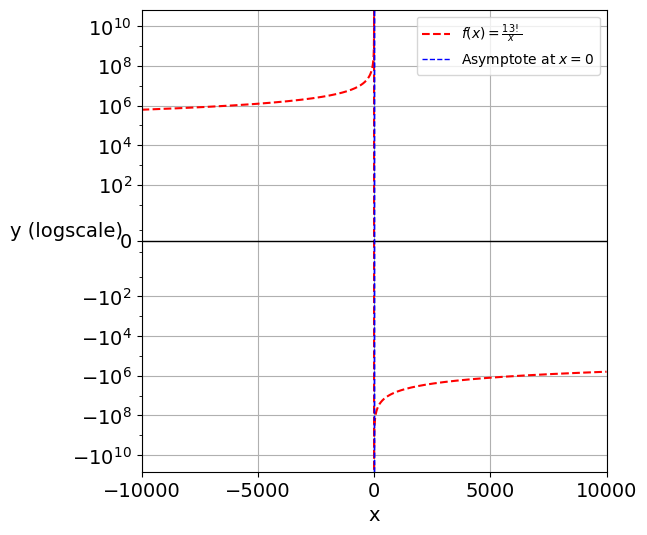


Multiset currently defined as s = {13.0, 13.0, nan}


In [82]:
explanation ='''
f(x) = -13!/x
The limit of f(x) as x approches 0, may depend on the direction of approach. 
If we approach from the negative direction, we get a postive y value, as two minus multiplied make a postitive, as the x value approachs 0 the y value increases and tends towards positive infinity.
If we approach from the positive direction, we get a negative y value, as positve and minus multiplied make a negative, as the x value approaches 0 the y value decreases and tends towards negative infinity.

As there are no restrictions on the directon as x approaches to 0, the answer is both positive and negative infinity which is not possible. Unless a direction is specified in the question, the answer cannot be expressed.

Therefore the answer is undefined and Not-a-Number(NaN).
We can see this behaviour graphically. y value tends towards postive and negative infintiy, depending on direction as x approaches 0. With a vertical asymptote at x = 0.

'''
print(explanation)

# Initialize numerator and denominator in x,y variable.
a = 13
x = np.linspace(-10000, 10000, 100000)
y_num = math.factorial(a)
y_den = x
#Intialize y, preventing division of 0.
y = np.where(x != 0, -(y_num / y_den), np.nan)

#Define figure size.Plot graph inputing x,y. 
mpl.rcParams['font.size']=14
fig = plt.figure(figsize=(6, 6))

#Plot graph inputing x,y and asymptote
plt.plot(x, y, 'r--', label=r'$f(x) = \frac{13!}{x}$')
plt.axvline(0, color='blue', linestyle='--', linewidth=1, label='Asymptote at $x = 0$')

plt.xlim(-10000, 10000)

#Label and define graph.
plt.legend(loc='upper right', fontsize=10)
plt.xlabel('x')
plt.ylabel('y (logscale)', rotation= 0)
plt.grid()
plt.axhline(c='black', linewidth=1)
plt.axvline(c='blue', linestyle='--', linewidth=1)
plt.yscale('symlog') 
plt.yticks([1e10, 1e8, 1e6, 1e4, 1e2, 0, -1e2, -1e4, - 1e6, - 1e8, -1e10 ])
plt.show()



set = np.array([13, 13, np.nan])


s = Multiset(set)
print(f'\nMultiset currently defined as s = {s}')

**5.2) Element 4 is limit from task 3 and  equals 0, therefore: s = {13, 13, NaN, 0}**

**5.2) Boolean logic proposition**  $$(13)(q \oplus p) \oplus r \leftrightarrow (\neg q \rightarrow \neg r) where:\\ p = S \cap {a, 0} \equiv {a}\\ q = {-\infty} \subset\\ r= S \cup {0} \subset S $$

In [83]:
a = 13
set = [13, 13, np.nan, 0]
s = Multiset(set)

# The final defined multiset s = {13, 13, NaN, 0}
print('s =', s)


# As there is no python function for implies, we need to code a function to carry out and implied logical operation.
def implies(a, b):

    if a and not b:
        return False
    else:
        return True

# Define p, q, r from logical problem as boolean value.

p = s.intersection({a, 0}) == {a}
q = {-math.inf}.issubset(s)
r = (s + {0}).issubset(s)

# Output boolean values of p, q, r.
print('p is equal to', p, ', q is equal to', q,'and r is equal to', r,)


ex1 ='''
So far we have defined the set, we have also defined p as False, since the set of intersection is equal to {a, 0} and is not equivilant to {a}.
We have defined q as False as negative infinty is not a subset of s. 
We have also defined r as False as the multiset s U {0} is  {13, 13, NaN, 0, 0} and s is not a subset.


Starting with the left hand side (lhs) and beginning inside the bracket. We have the proposition p XOR q, as both are false the propostion is false. Then the result of the bracket(False) XOR r, since
r is false the proposition is false. a is a constant and we will resolve all propositional statements before finally resolving boolean value with a.
'''
print(ex1)
# Output lhs to show True answer.
lhs = (p^q)^(r)
print('Value for left hand side is equal to', lhs,'.')

ex2 ='''
Continuing with the right hand side (rhs), the implication of not q and not r. Since the negation of q is True, the second statement needs to be True for the implication to be true.
The negation of r is true therefore the implication is True so the rhs is True.
'''
print(ex2)
# Output rhs to show boolean value is false.
rhs = print('\nThe answer to the logical impliction is ',(implies(not q, not r)), 'therefore the rhs is equal to', (implies(not q, not r)))

ex3 = '''
Final statement: the lhs is false, the right hand side is true. Since they are not equivalent the proposition is false.
a multiplied by False = 0, which is equal to Boolean False. 
'''
print(ex3)
#Out put result of equivalent propostion
print('\nThe answer to the equivalent propostion is', lhs == rhs)


#Show that True in python is equivalent to integer 1 and the identity element...
true = 1*True
false = 1*False
print(f'\nIn python a boolean True is equivalent to {true} and boolean False is equivalent to {false}')

# Output a value and its boolean value.
print('a is equal to', a*(lhs == rhs), 'which is equal to boolean', lhs == rhs)

#Show result for entire proposition 
if a*(p^q)^r == implies(not q, not r):
    print('Choose the left hand lift.')

else:
    print('\nChoose the right hand lift.')


s = {13, 13, nan, 0}
p is equal to False , q is equal to False and r is equal to False

So far we have defined the set, we have also defined p as False, since the set of intersection is equal to {a, 0} and is not equivilant to {a}.
We have defined q as False as negative infinty is not a subset of s. 
We have also defined r as False as the multiset s U {0} is  {13, 13, NaN, 0, 0} and s is not a subset.


Starting with the left hand side (lhs) and beginning inside the bracket. We have the proposition p XOR q, as both are false the propostion is false. Then the result of the bracket(False) XOR r, since
r is false the proposition is false. a is a constant and we will resolve all propositional statements before finally resolving boolean value with a.

Value for left hand side is equal to False .

Continuing with the right hand side (rhs), the implication of not q and not r. Since the negation of q is True, the second statement needs to be True for the implication to be true.
The negation of